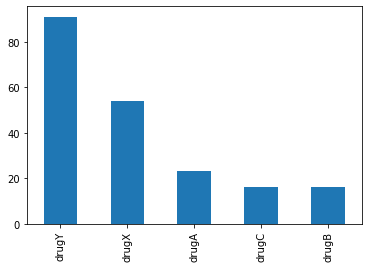

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


dataset = pd.read_csv("./drug200.csv")
dataset['Drug'].value_counts().plot(kind='bar')
plt.savefig("drugset.pdf")

In [135]:
#sanitizing the ordinal and categorical data into numerical, drop column female to prevent co-linearity

drugsData = pd.DataFrame(dataset)

ordinalMap = {
    "HIGH":3,
    "NORMAL":2,
    "LOW":1
}

#mapping ordinal values to numerical
drugsData['BP'] = drugsData['BP'].map(ordinalMap)
drugsData['Cholesterol'] = drugsData['Cholesterol'].map(ordinalMap)

#categorical to numerical through 'get_dummies' method
dataset_processed = pd.get_dummies(drugsData, columns=['Sex'])

dataset_final = dataset_processed.drop(['Sex_F'], axis ='columns')
print(dataset_final)

     Age  BP  Cholesterol  Na_to_K   Drug  Sex_M
0     23   3            3   25.355  drugY      0
1     47   1            3   13.093  drugC      1
2     47   1            3   10.114  drugC      1
3     28   2            3    7.798  drugX      0
4     61   1            3   18.043  drugY      0
..   ...  ..          ...      ...    ...    ...
195   56   1            3   11.567  drugC      0
196   16   1            3   12.006  drugC      1
197   52   2            3    9.894  drugX      1
198   23   2            2   14.020  drugX      1
199   40   1            2   11.349  drugX      0

[200 rows x 6 columns]


In [136]:
#split data into train and test set

from sklearn.model_selection import train_test_split

X = dataset_final.drop(['Drug'], axis = 'columns')
Y = dataset_final['Drug']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [137]:
#Model 1: Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X_train, Y_train)

GaussianNB()

In [138]:
#Model 2: Base Decision Tree

from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [139]:
#Model 3: Top Decision Tree (with parameters)

from sklearn.model_selection import GridSearchCV

hyper_params1 = {
    'criterion':['gini', 'entropy'], 
    'max_depth': [2,10,20], 
    'min_samples_split': [2, 20, 50]}

clf_TDT = GridSearchCV(DecisionTreeClassifier(), hyper_params)
clf_TDT.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 10, 20],
                         'min_samples_split': [2, 20, 50]})

In [140]:
#Model 4: Perceptron

from sklearn.linear_model import Perceptron

clf_P = Perceptron()
clf_P.fit(X_train, Y_train)

Perceptron()

In [141]:
#Model 5: Base Multi-Layered Perceptron

from sklearn.neural_network import MLPClassifier

clf_MLP = MLPClassifier()
clf_MLP.fit(X_train, Y_train)

MLPClassifier()

In [ ]:
#Model 6: Top Multi-Layered Perceptron

hyper_params2 = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf_TMLP = GridSearchCV(MLPClassifier(), hyper_params2, n_jobs=-1, cv=3)
clf_TMLP.fit(X_train, Y_train)